In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [166]:
import warnings
warnings.simplefilter(action='ignore',category = FutureWarning)

In [167]:
df = pd.read_csv("loan.csv")

In [168]:
df

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,M,34.169998,2.750,owner,given,guard_etc,self_empl,2,0,t,given,232,200,reject
425,F,22.250000,1.250,rent,not_given,unemploye,unemploye,3,0,f,given,280,0,reject
426,M,23.330000,1.500,owner,given,creative_,governmen,1,0,f,given,422,200,accept
427,M,21.000000,4.790,rent,not_given,productio,private_s,2,1,t,given,80,300,accept


In [169]:
null_columns = df.columns[df.isna().any()].tolist()

In [170]:
print("Number of null columns: ", len(null_columns))

Number of null columns:  0


In [171]:
df.isnull().sum()

Sex                0
Age                0
Time_at_address    0
Res_status         0
Telephone          0
Occupation         0
Job_status         0
Time_employed      0
Time_bank          0
Liab_ref           0
Acc_ref            0
Home_Expn          0
Balance            0
Decision           0
dtype: int64

In [172]:
df.head(30)

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject
5,F,16.080000,0.335,owner,given,unemploye,unemploye,0,1,f,given,160,126,reject
6,M,23.170000,11.125,owner,given,professio,governmen,0,1,f,given,100,0,accept
7,F,27.580000,3.000,owner,given,manager,private_s,2,1,t,given,280,10,reject
8,F,19.170000,5.415,owner,given,guard_etc,governmen,0,0,f,given,80,484,reject
9,F,27.250000,0.290,owner,given,manager,governmen,0,1,t,given,272,108,reject


In [173]:
df.tail(30)

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
399,M,43.000000,0.290,rent,not_given,semi_pro,governmen,1,8,f,given,100,375,accept
400,M,52.330002,1.375,rent,not_given,creative_,governmen,9,0,t,given,200,100,reject
401,M,21.830000,0.250,owner,given,driver,governmen,0,0,t,given,0,0,accept
402,M,25.670000,3.250,owner,given,creative_,governmen,2,1,t,given,416,21,reject
403,F,22.670000,0.750,owner,given,creative_,private_s,2,2,t,given,200,394,reject
404,F,33.669998,0.375,owner,given,semi_pro,private_s,0,0,f,given,300,44,accept
405,F,21.670000,11.500,rent,not_given,labourer,private_s,0,11,t,given,0,0,accept
406,M,62.750000,7.000,owner,given,executive,retired,0,0,f,given,0,12,reject
407,M,23.330000,11.625,rent,not_given,productio,private_s,0,0,t,given,160,300,accept
408,M,31.330000,19.500,owner,given,creative_,private_s,7,16,f,given,0,5000,accept


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              429 non-null    object 
 1   Age              429 non-null    float64
 2   Time_at_address  429 non-null    float64
 3   Res_status       429 non-null    object 
 4   Telephone        429 non-null    object 
 5   Occupation       429 non-null    object 
 6   Job_status       429 non-null    object 
 7   Time_employed    429 non-null    int64  
 8   Time_bank        429 non-null    int64  
 9   Liab_ref         429 non-null    object 
 10  Acc_ref          429 non-null    object 
 11  Home_Expn        429 non-null    int64  
 12  Balance          429 non-null    int64  
 13  Decision         429 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 47.0+ KB


### Performing the one hot encoding on the given dataset

In [175]:
df = pd.get_dummies(df, columns = ['Sex', 'Res_status', 'Telephone', 'Occupation', 'Job_status', 'Liab_ref', 'Acc_ref'])

In [176]:
df

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Decision,Sex_F,Sex_M,Res_status_owner,...,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_f,Liab_ref_t,Acc_ref_given,Acc_ref_oth_inst_
0,50.750000,0.585,0,0,145,0,reject,0,1,1,...,0,0,0,0,0,1,1,0,1,0
1,19.670000,10.000,0,0,140,0,reject,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,52.830002,15.000,5,14,0,2200,accept,1,0,1,...,0,1,0,0,0,0,1,0,1,0
3,22.670000,2.540,2,0,0,0,accept,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,29.250000,13.000,0,0,228,0,reject,0,1,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,34.169998,2.750,2,0,232,200,reject,0,1,1,...,0,0,0,1,0,0,0,1,1,0
425,22.250000,1.250,3,0,280,0,reject,1,0,0,...,0,0,0,0,0,1,1,0,1,0
426,23.330000,1.500,1,0,422,200,accept,0,1,1,...,0,0,0,0,0,0,1,0,1,0
427,21.000000,4.790,2,1,80,300,accept,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [177]:
df['Decision'] = df['Decision'].replace(['accept','reject'],[1,0])

In [178]:
df

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Decision,Sex_F,Sex_M,Res_status_owner,...,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_f,Liab_ref_t,Acc_ref_given,Acc_ref_oth_inst_
0,50.750000,0.585,0,0,145,0,0,0,1,1,...,0,0,0,0,0,1,1,0,1,0
1,19.670000,10.000,0,0,140,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,52.830002,15.000,5,14,0,2200,1,1,0,1,...,0,1,0,0,0,0,1,0,1,0
3,22.670000,2.540,2,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,29.250000,13.000,0,0,228,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,34.169998,2.750,2,0,232,200,0,0,1,1,...,0,0,0,1,0,0,0,1,1,0
425,22.250000,1.250,3,0,280,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
426,23.330000,1.500,1,0,422,200,1,0,1,1,...,0,0,0,0,0,0,1,0,1,0
427,21.000000,4.790,2,1,80,300,1,0,1,0,...,0,1,0,0,0,0,0,1,1,0


### Analyzing the data after encoding with the help of graphs.

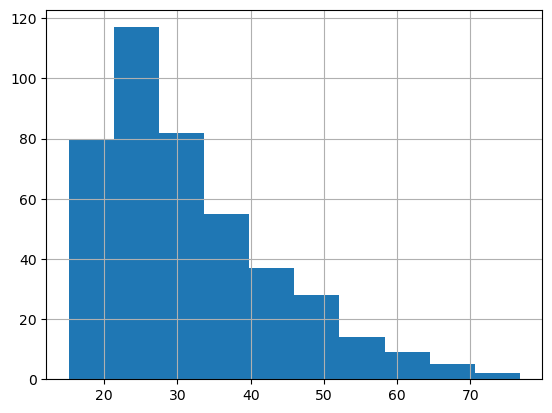

In [179]:
df['Age'].hist()
plt.show()

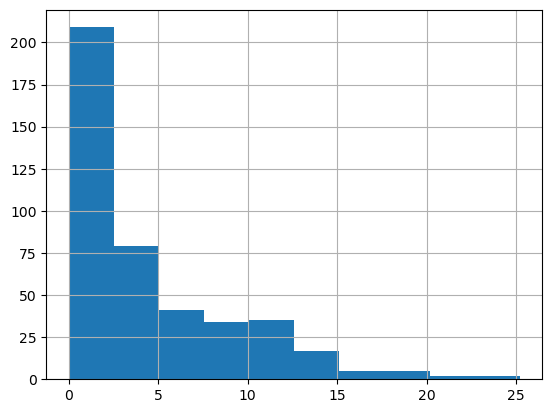

In [180]:
df['Time_at_address'].hist()
plt.show()

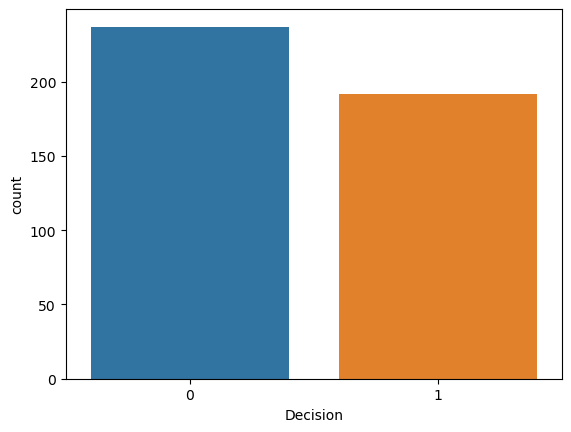

In [181]:
sns.countplot(df['Decision'])
plt.show()

### Training the model using Logistic Regression 

In [182]:
from sklearn.linear_model import LogisticRegression

In [183]:
model = LogisticRegression()

In [184]:
X = df[['Age', 'Time_at_address', 'Time_employed', 'Time_bank', 'Home_Expn',
       'Balance', 'Sex_F', 'Sex_M', 'Res_status_owner',
       'Res_status_rent', 'Telephone_given', 'Telephone_not_given',
       'Occupation_creative_', 'Occupation_driver', 'Occupation_executive',
       'Occupation_guard_etc', 'Occupation_labourer', 'Occupation_manager',
       'Occupation_office_st', 'Occupation_productio', 'Occupation_professio',
       'Occupation_sales', 'Occupation_semi_pro', 'Occupation_unemploye',
       'Job_status_governmen', 'Job_status_military', 'Job_status_private_s',
       'Job_status_retired', 'Job_status_self_empl', 'Job_status_student',
       'Job_status_unemploye', 'Liab_ref_f', 'Liab_ref_t', 'Acc_ref_given',
       'Acc_ref_oth_inst_']]

In [185]:
y = df['Decision']
model.fit(X, y)

/Users/prathamesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [186]:
import statsmodels.api as sm

In [187]:
y_pred = model.predict(X)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [188]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Decision   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     8.298
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           3.56e-25
Time:                        19:42:44   Log-Likelihood:                -213.78
No. Observations:                 429   AIC:                             483.6
Df Residuals:                     401   BIC:                             597.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0338 

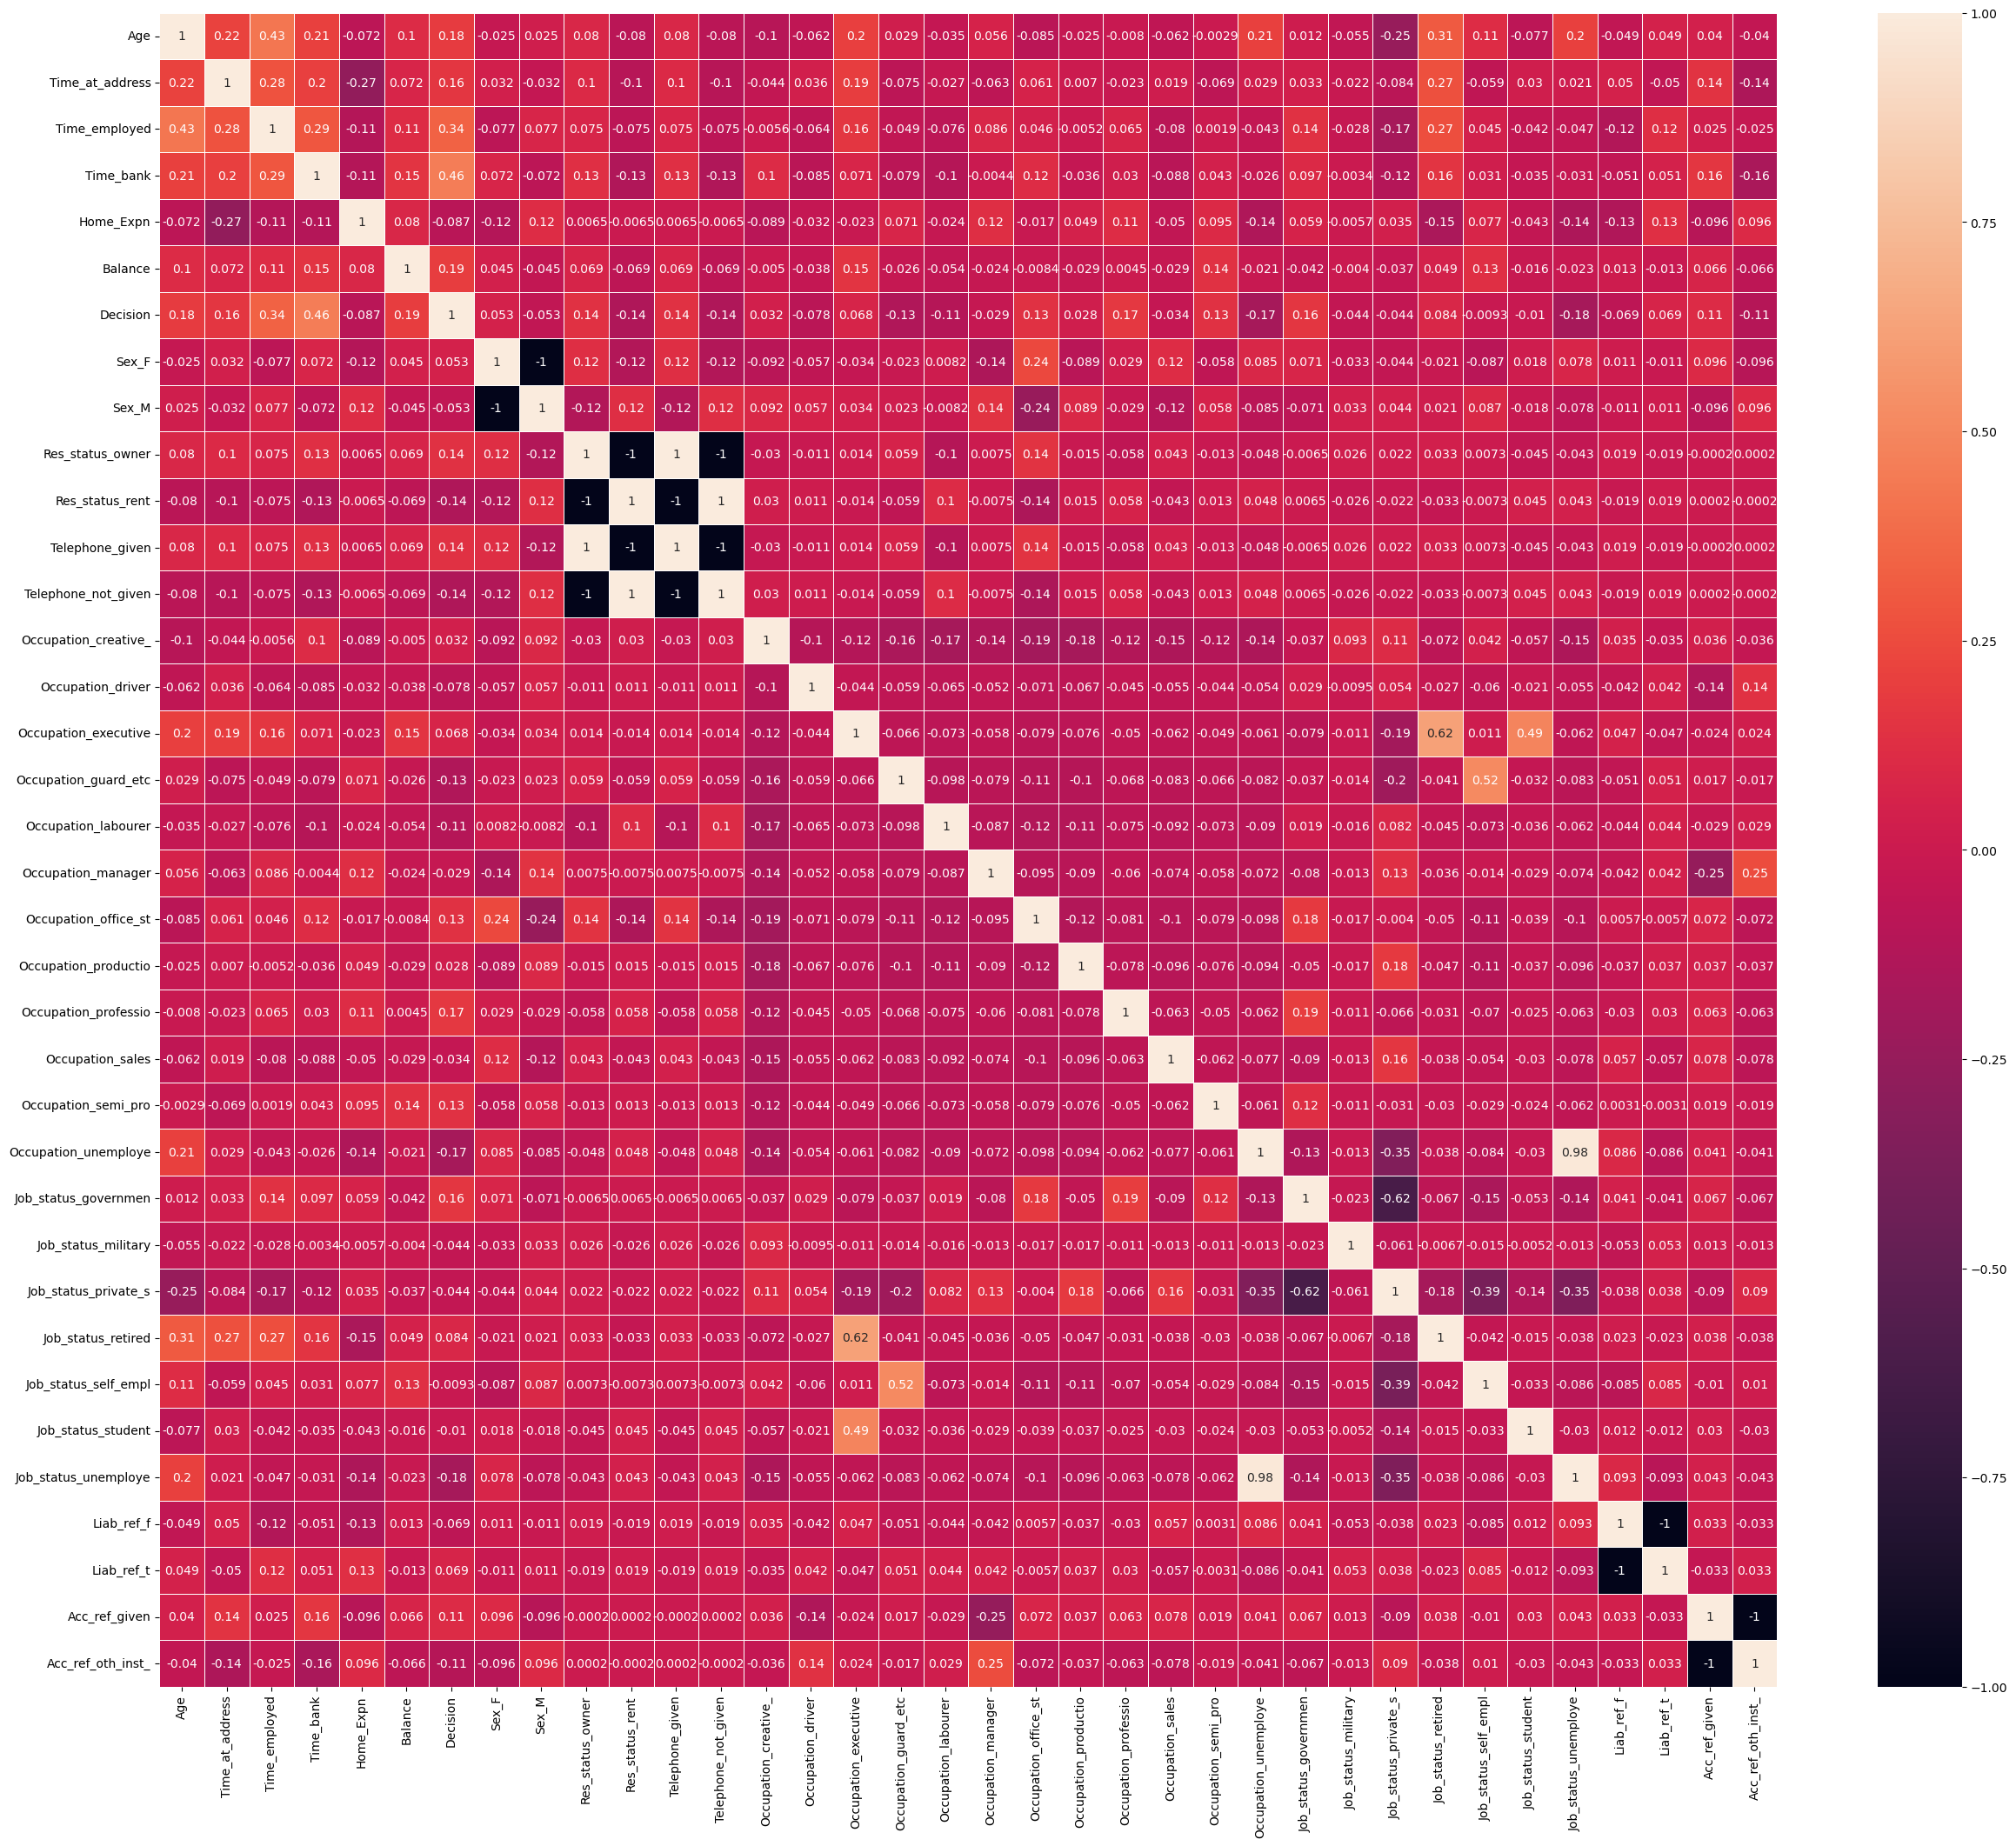

In [189]:
fig, ax = plt.subplots(figsize=(30,25))
ax = sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [190]:
model = LogisticRegression()

In [191]:
loan_df = df[['Age', 'Time_employed', 'Time_bank', 'Home_Expn', 'Balance', 'Decision', 
                           'Res_status_owner', 'Telephone_given', 'Occupation_guard_etc', 
                           'Occupation_labourer', 'Occupation_professio', 'Occupation_semi_pro', 
                           'Job_status_governmen', 'Job_status_private_s', 'Job_status_self_empl']]

In [192]:
y = df['Decision']
X = df[['Age', 'Time_employed', 'Time_bank', 'Home_Expn', 'Balance', 
                           'Res_status_owner', 'Telephone_given', 'Occupation_guard_etc', 
                           'Occupation_labourer', 'Occupation_professio', 'Occupation_semi_pro', 
                           'Job_status_governmen', 'Job_status_private_s', 'Job_status_self_empl']]

In [193]:
model.fit(X,y)

/Users/prathamesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [194]:
y_pred = model.predict(X)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [195]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Decision   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     16.58
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           1.21e-30
Time:                        19:42:46   Log-Likelihood:                -219.26
No. Observations:                 429   AIC:                             466.5
Df Residuals:                     415   BIC:                             523.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0572 

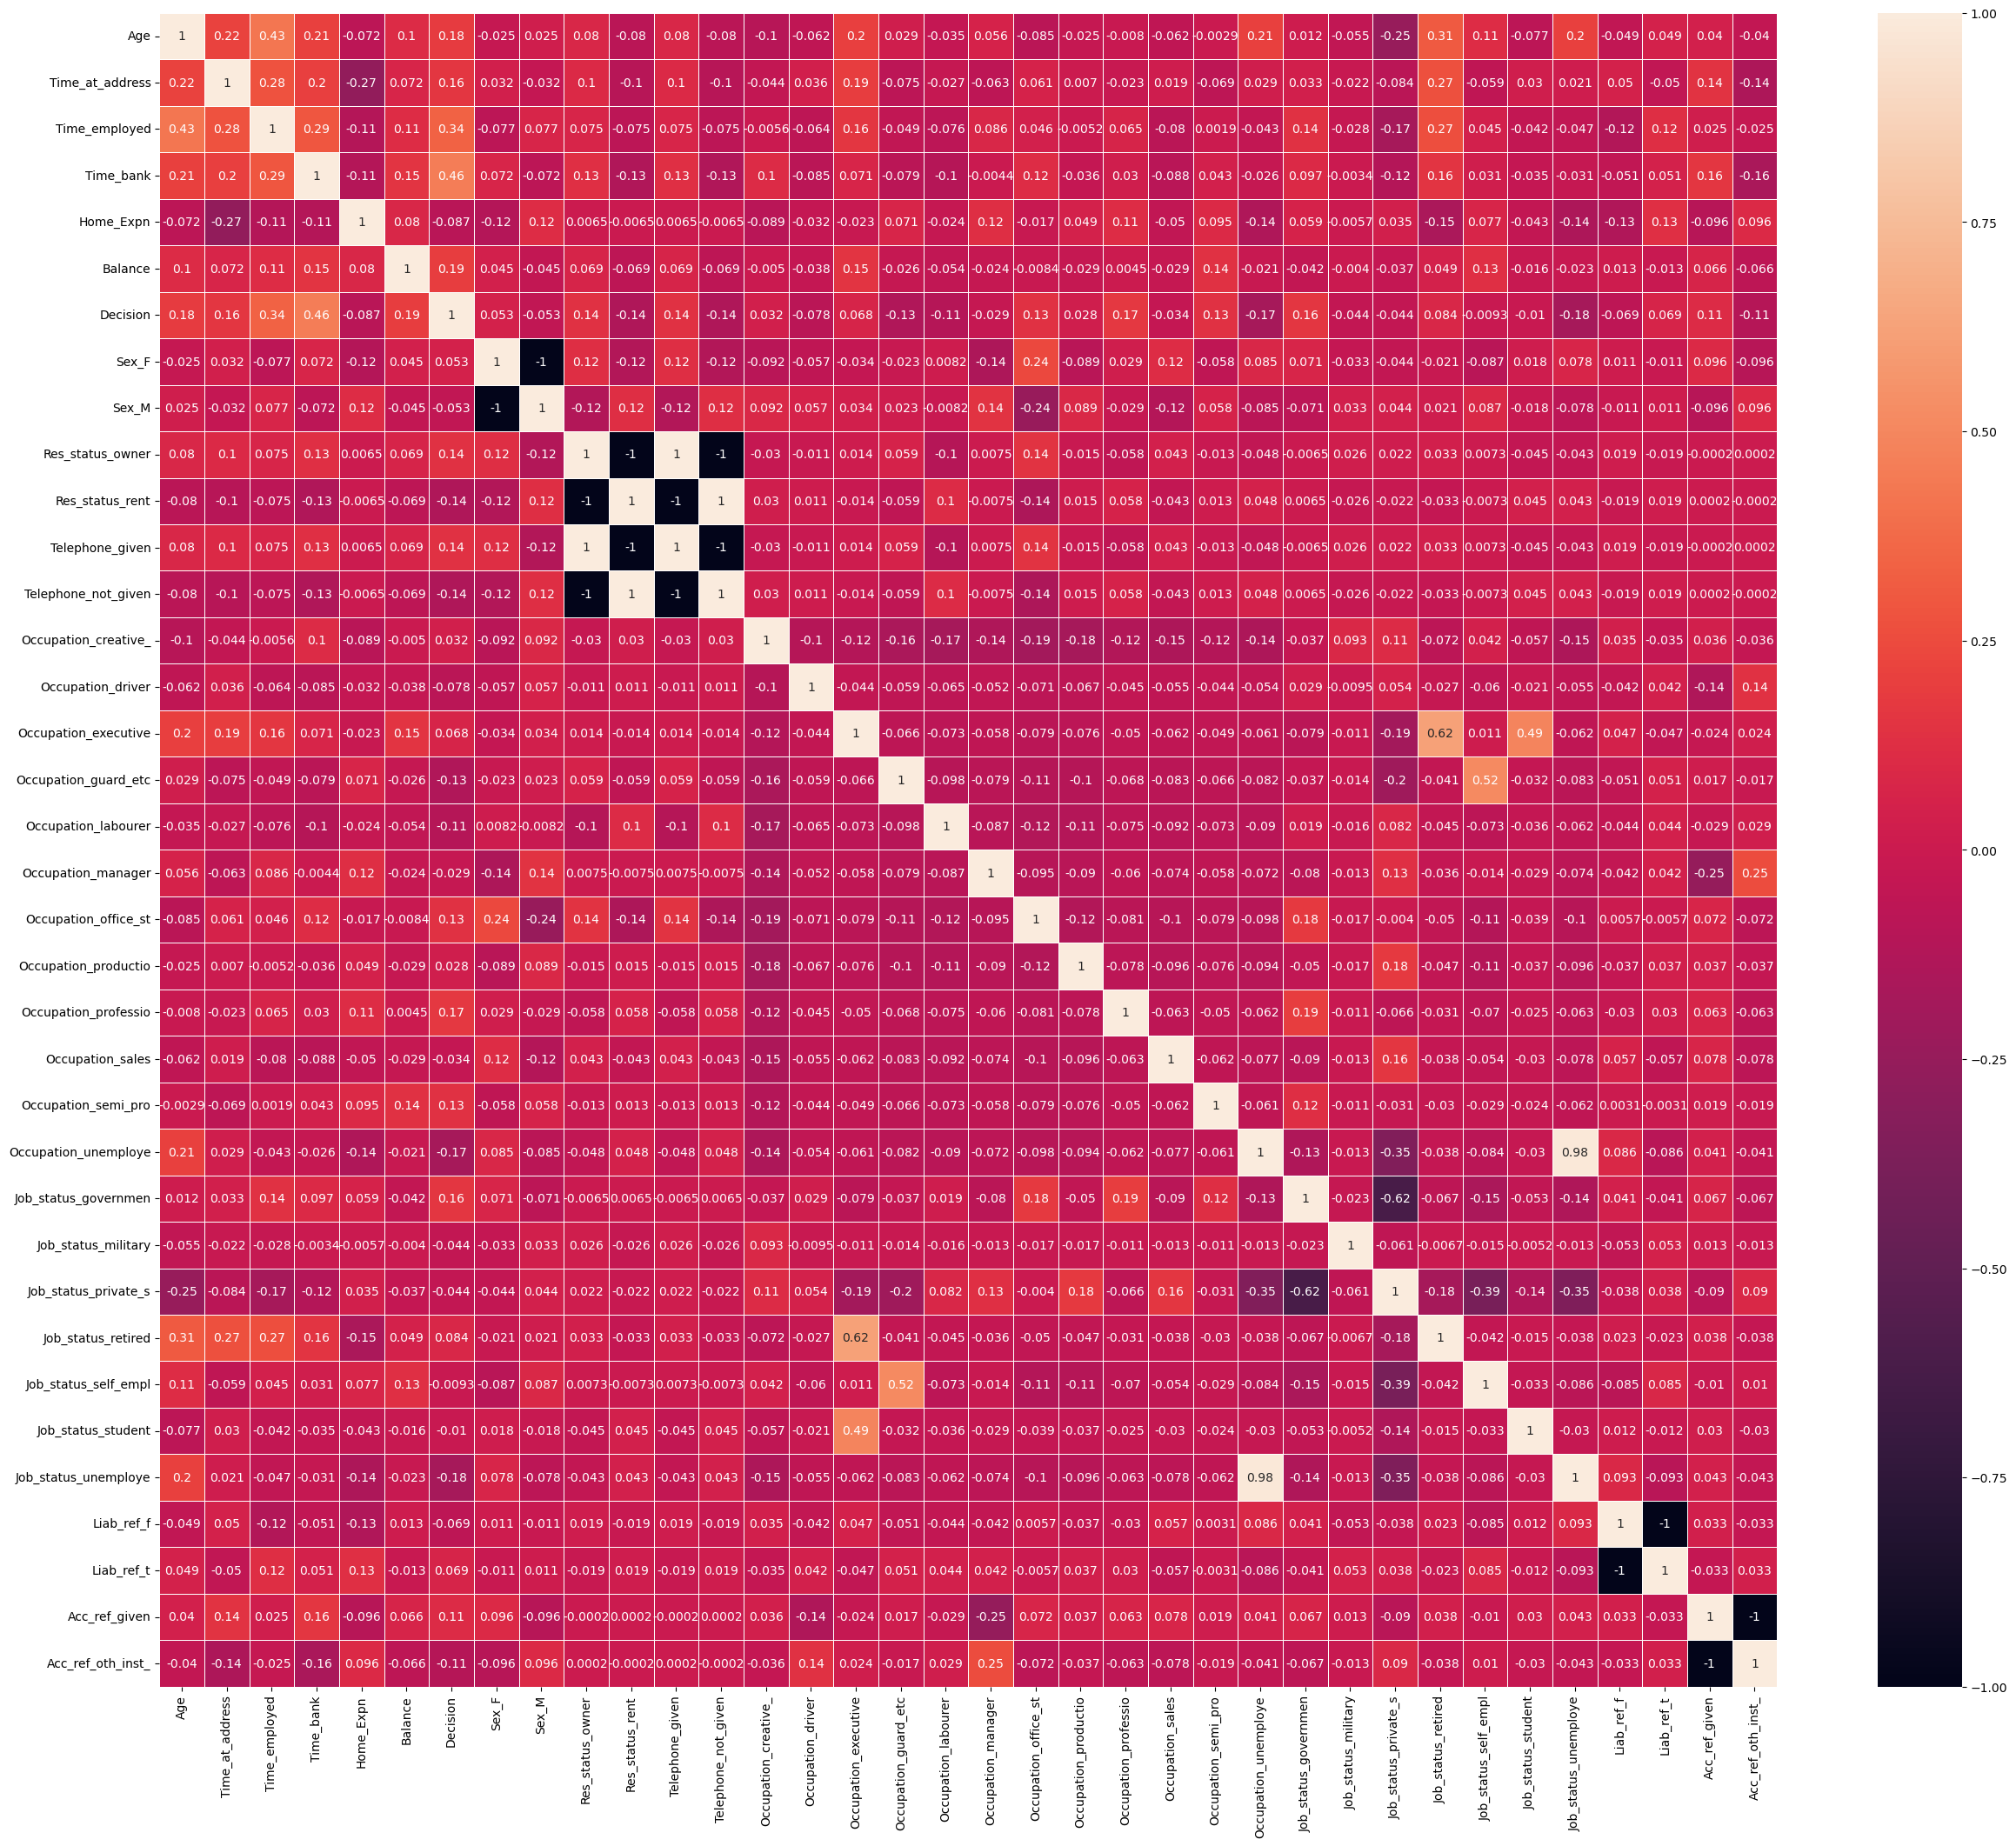

In [196]:
fig, ax = plt.subplots(figsize=(30,25))
ax = sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [198]:
model = LogisticRegression()

In [199]:
df = df[['Time_employed', 'Time_bank', 'Home_Expn', 'Balance', 'Decision',
                           'Res_status_owner', 'Telephone_given', 'Occupation_guard_etc', 
                           'Occupation_professio', 'Occupation_semi_pro', 
                           'Job_status_governmen', 'Job_status_private_s', 'Job_status_self_empl']]

In [202]:
y = df['Decision']
X=df.drop(['Decision'],axis=1)

In [203]:
model.fit(X,y)

/Users/prathamesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [204]:
y_pred = model.predict(X)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [205]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Decision   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     19.24
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           2.90e-31
Time:                        19:46:32   Log-Likelihood:                -220.94
No. Observations:                 429   AIC:                             465.9
Df Residuals:                     417   BIC:                             514.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0237 

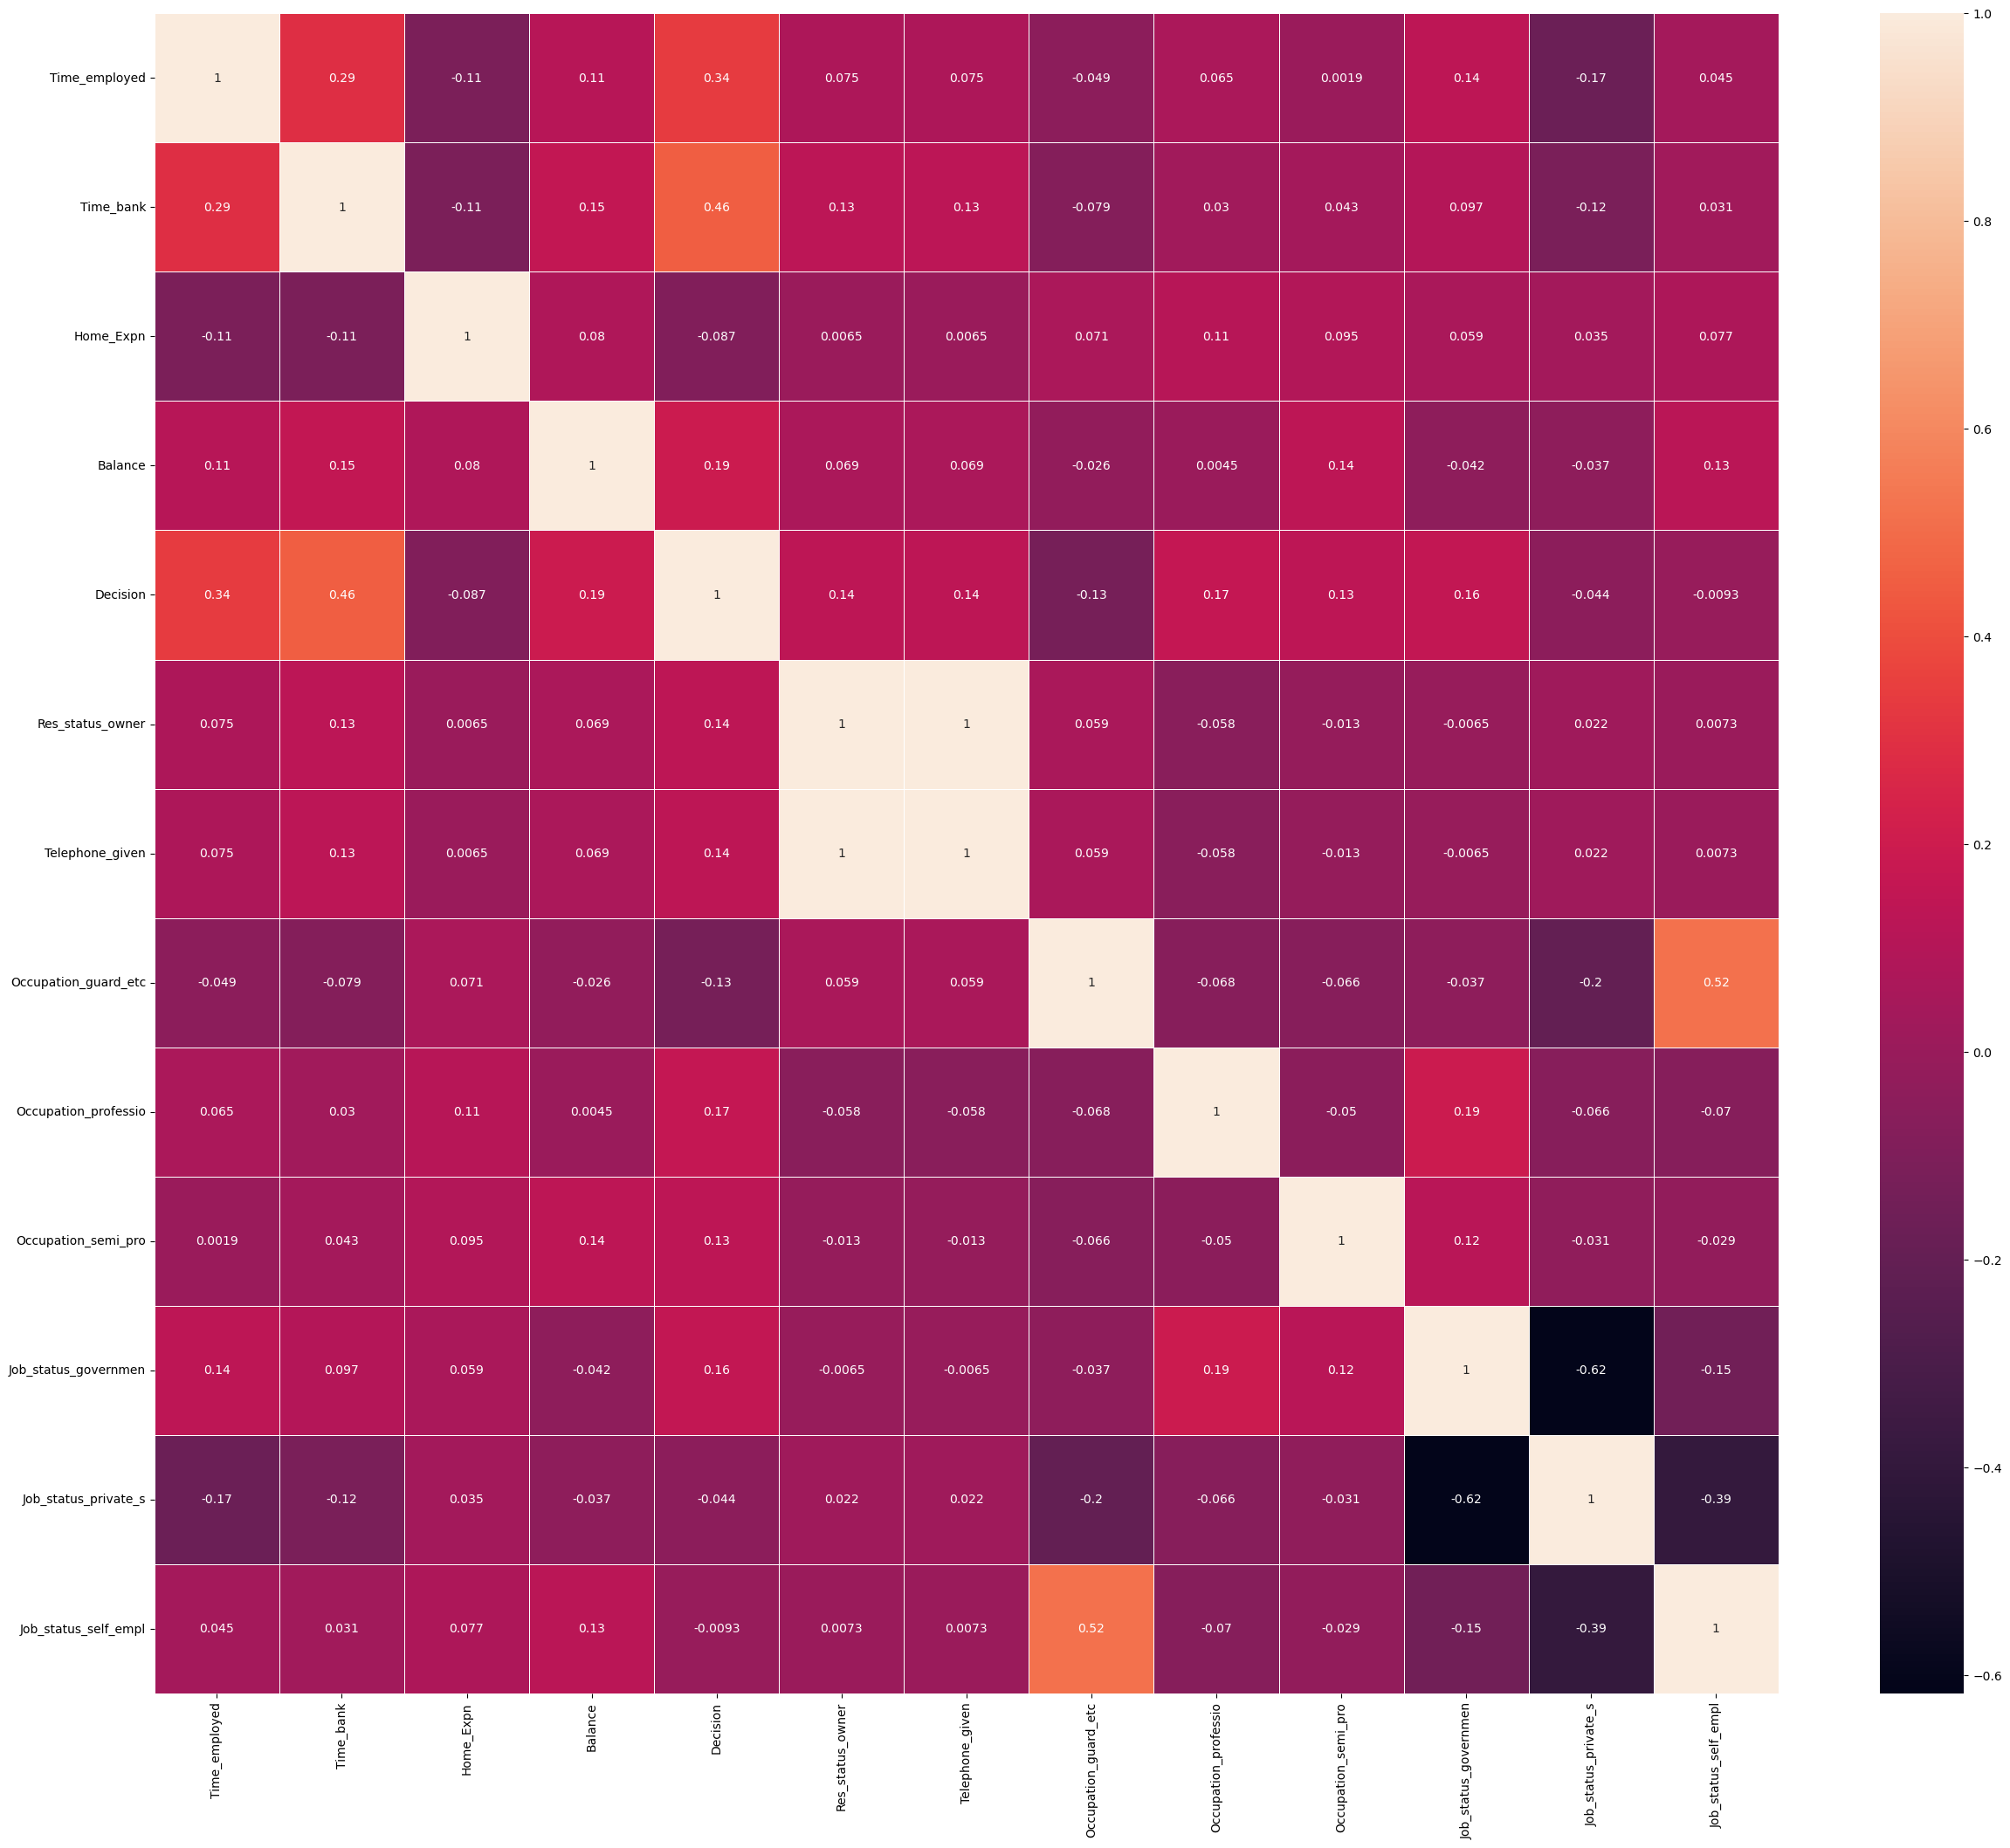

In [207]:
fig, ax = plt.subplots(figsize=(30,25))
ax = sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

We have already performed the Durbin - Watson Test by using statsmodel to check if there is any co-relation between the residuals. If the values is below 2.5 then we do not have any auto -  correlation. Here we have the value below 2 in all the predictions performed. 
####  Hence there is no auto correlation 

### Checking for the null hypothesis

In [208]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [210]:
het_goldfeldquandt(y, X)

(1.157330350877877, 0.14962000139086157, 'increasing')

Here the P value is greater than 0.05 hence we accept the null hypothesis. Therefore we can say that the assumption of homoskedasticity is followed.

### Checking for multicolinearity

In [211]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [215]:
loan = []

for i in range (X.shape[1]):
    loan.append(variance_inflation_factor(X.values,i))
loan = pd.Series(loan,index = X.columns)

In [216]:
loan = round(loan,4)

In [217]:
loan

const                   13.6670
Time_employed            1.1428
Time_bank                1.1538
Home_Expn                1.1007
Balance                  1.0894
Res_status_owner            inf
Telephone_given             inf
Occupation_guard_etc     1.4190
Occupation_professio     1.0735
Occupation_semi_pro      1.0596
Job_status_governmen     2.4799
Job_status_private_s     2.7630
Job_status_self_empl     2.1769
dtype: float64

If the variable values are above 10 then we should drop the column. Here only the value of constants is above 10.